In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from itertools import combinations



In [9]:
df = pd.read_csv('Data 01-12-23/No_Current_Data.csv', header=None, usecols=[3,4])

print(len(df[3]))

2500


In [10]:
time = df[3][500:1800]
inten = df[4][500:1800]

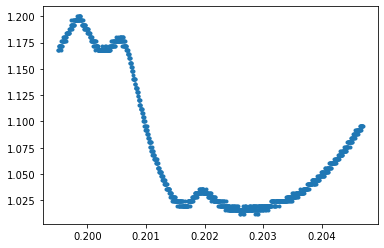

In [11]:
plt.plot(time, inten, ".")

[   6   12   19   25   28   31   33   47   56   64   82   87   89   92
   95  105  112  115  125  136  142  144  150  153  155  158  163  172
  188  202  204  219  225  228  234  237  245  255  264  268  271  275
  279  284  291  297  307  320  348  365  369  372  377  393  395  398
  400  403  410  421  447  454  462  474  479  482  486  491  495  497
  512  518  521  526  529  534  541  552  558  573  582  584  587  590
  602  604  607  611  615  630  639  641  643  646  648  651  657  662
  665  668  685  689  695  698  702  706  718  724  727  730  740  748
  752  759  764  769  776  782  789  797  801  816  820  824  831  834
  837  840  845  849  856  860  864  868  872  879  884  890  907  911
  917  922  924  927  936  972  976  979  984  989  992  995  998 1004
 1008 1013 1017 1020 1033 1044 1048 1062 1065 1068 1083 1087 1092 1095
 1098 1103 1110 1112 1121 1124 1127 1132 1135 1137 1140 1146 1148 1157
 1161 1164 1178 1181 1184 1196 1203 1209 1222 1224 1232 1236 1241 1249
 1251 

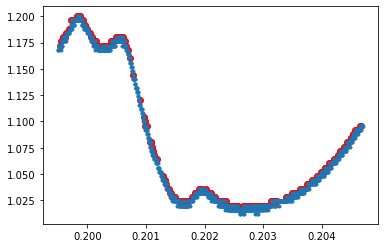

In [12]:
indices, info =find_peaks(inten, prominence=-1)
print(indices)
print(time)
plt.plot(time, inten, ".")
plt.scatter(time[indices+500], inten[indices+500], color="red")

In [ ]:
peak1, peak2, peak3=time[indices+500]
peaks_list = [peak1, peak2, peak3]

peak_diff=[abs(peaks_list[0]-peaks_list[1]), abs(peaks_list[1]-peaks_list[2]), abs(peaks_list[0]-peaks_list[2])]

ratio_peaks = [peak_diff[0]/peak_diff[1],peak_diff[1]/peak_diff[2],peak_diff[0]/peak_diff[2]]
print(peaks_list)
print(peak_diff)
print(ratio_peaks)


[-0.0351, -0.023, -0.002]
[0.0121, 0.020999999999999998, 0.0331]
[0.5761904761904763, 0.634441087613293, 0.36555891238670696]


In [ ]:
other_peaks = [193.741, -72.911, -229.852, (193.741+ -72.911)/2,(-72.911+ -229.852)/2,(193.741+ -229.952)/2]
other_peaks


[193.741,
 -72.911,
 -229.852,
 60.415000000000006,
 -151.38150000000002,
 -18.105499999999992]

In [ ]:
other_peaks.sort()
other_peaks

[-229.852,
 -151.38150000000002,
 -72.911,
 -18.105499999999992,
 60.415000000000006,
 193.741]

In [ ]:
combination = list(combinations(other_peaks, 3))
accuracy = []
for alist in combination:
    sum_list=[]
    ratio_counter=0
    diff_list=[abs(alist[0]-alist[1]), abs(alist[1]-alist[2]), abs(alist[0]-alist[2])]
    ratio_list=[diff_list[0]/diff_list[1], diff_list[1]/diff_list[2], diff_list[0]/diff_list[2]]
    for ratio in ratio_list:
        ratio_of_ratio=ratio/ratio_peaks[ratio_counter]
        sum_list.append(ratio_of_ratio)
        ratio_counter+=1
    accuracy.append(sum_list)

accuracy

[[1.735537190082644, 0.7880952380952384, 1.3677685950413219],
 [1.0218529298176724, 0.9920747776457316, 1.013754518135507],
 [0.6430156828577437, 1.1500846675318803, 0.739522477837233],
 [0.39460907670285217, 1.2842015746696658, 0.5067575976807457],
 [4.96988335383785, 0.40795907910098705, 2.027509036271014],
 [2.0429394277842303, 0.7239788588732838, 1.4790449556744665],
 [1.0214697138921152, 0.9922126731488551, 1.0135151953614916],
 [4.680229056358972, 0.4263773156635591, 1.9955435017409309],
 [1.7347179472865246, 0.7882812882042094, 1.3674456981579837],
 [3.7784766178668745, 0.49610633657442754, 1.874526192722068],
 [2.484941676918925, 0.6481580115163807, 1.6106348560459511],
 [1.0214697138921152, 0.992212673148855, 1.0135151953614916],
 [0.5107348569460576, 1.217812060520954, 0.621979068517353],
 [2.945797015371203, 0.5843499032595642, 1.7213762009544753],
 [1.091854028957073, 0.9675127982507244, 1.0563827468375853],
 [2.7570069039747596, 0.608906030260477, 1.678758129299999],
 [1.2

In [ ]:
counter = 0
possibilities = []
for f in accuracy:
    if 0.99<f[0]<1.05 and 0.99<f[1]<1.05 and 0.99<f[2]<1.05:
        possibilities.append(combination[counter])
    counter+=1

possibilities

[(-229.852, -151.38150000000002, -18.105499999999992),
 (-229.852, -72.911, 193.741),
 (-151.38150000000002, -72.911, 60.415000000000006),
 (-18.105499999999992, 60.415000000000006, 193.741)]

Looking at the last list we see that, from left to right, our peaks line up with CO13, CO23 and F3.

However, there are also other peaks that it lines up with, so we should use other arguments to determine the peaks.